# **Preprocess data**

#### Import csv label data file

In [ ]:
import pandas as pd
import os

print(os.getcwd())
# url = "/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/maestro-v3.0.0/maestro-v3.0.0.csv"
url = "f:\Dataset_open_topic\maestro-v3.0.0_all\maestro-v3.0.0\maestro-v3.0.0.csv"
df = pd.read_csv(url)
df.columns



f:\Dataset_open_topic\maestro-v3.0.0_all


Index(['canonical_composer', 'canonical_title', 'split', 'year',
       'midi_filename', 'audio_filename', 'duration'],
      dtype='object')

In [ ]:
import numpy as np
# Train file path
train_midi = []
train_audio = []

# Test file path
test_midi = []
test_audio = []

# Validation file path
val_midi = []
val_audio = []

for i in range(len(df['split'])):
    if df['split'][i] == 'train':
        train_midi.append(df['midi_filename'][i])
        train_audio.append(df['audio_filename'][i])
    elif df['split'][i] == 'test':
        test_midi.append(df['midi_filename'][i])
        test_audio.append(df['audio_filename'][i])
    elif df['split'][i] == 'validation':
        val_midi.append(df['midi_filename'][i])
        val_audio.append(df['audio_filename'][i])
    else :
        print(f"No label {df['midi_filename'][i], df['audio_filename'][i]}")

# Recheck size of data file
print("Train midi size: ",len(train_midi))
print("Train audio size: ",len(train_audio))

print("Test midi size: ",len(test_midi))
print("Test audio size: ",len(test_audio))

print("Validation midi size: ",len(val_midi))
print("Validation audio size: ",len(val_audio))

samp_val_audio = int(np.floor(len(val_audio) * .1))
samp_train_audio = int(np.floor(len(train_audio) * .02))
samp_test_audio = int(np.floor(len(test_audio) * .1))

print(samp_train_audio)
print(samp_test_audio)
print(samp_val_audio)

Train midi size:  962
Train audio size:  962
Test midi size:  177
Test audio size:  177
Validation midi size:  137
Validation audio size:  137
19
17
13


In [ ]:
import numpy as np
np.__version__

'2.1.0'

## **Loop for Create spectrogram data**

#### CQT generate

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
# dir_name = "/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/maestro-v3.0.0"
# output_path = "/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/Processed_data"
dir_name = "f:\Dataset_open_topic\maestro-v3.0.0_all\maestro-v3.0.0"
output_path = "f:\Dataset_open_topic\maestro-v3.0.0_all\Processed_data"


In [ ]:
# CQT configuration
hop_length_sec = 0.01               # 10 ms
fmin = librosa.note_to_hz('A0')     # Start at A0 (88 keys piano)
bin_per_octave = 36                 # Number of bins per octave
n_bins = 267                        # Number of frequency bins, starting at fmin

# Define segment size 
segment_duration = 10  # seconds

In [ ]:
# for ind in tqdm(range((samp_val_audio))):
#     audio_path = val_audio[ind]
#     full_path = os.path.join(dir_name, audio_path)

#     y, sr = librosa.load(full_path, sr=None)
#     segment_samples = sr * segment_duration  # Convert seconds to samples
#     hop_length_samples = int(hop_length_sec * sr)       # Number of samples 
#     min_signal_length = len(y)  # Get the shortest audio segment length
#     max_n_fft = 2 ** int(np.floor(np.log2(min_signal_length)))
#     # print(f"{ind} {audio_path} extracting")

#     for i, start_sample in (enumerate(range(0, len(y), segment_samples))):
#         end_sample = start_sample + segment_samples
#         y_segment = y[start_sample:end_sample]  # Extract 10-sec segment

#         CQT_segment = librosa.cqt(y=y_segment, sr=sr, hop_length=hop_length_samples, 
#                                 bins_per_octave=bin_per_octave, n_bins=n_bins, fmin=fmin)
#         CQT_db = librosa.amplitude_to_db(np.abs(CQT_segment), ref=np.max)
        
#         audio_path = os.path.basename(audio_path)
#         npy_filename = os.path.join(output_path, "validation", audio_path + f"_{i}.npy")
#         # print(npy_filename)
#         np.save(npy_filename, CQT_db)
#         # print(f"Saved: {npy_filename}")

  0%|          | 0/13 [00:01<?, ?it/s]


AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [ ]:
# for ind in tqdm(range((samp_test_audio))):
#     audio_path = test_audio[ind]
#     full_path = os.path.join(dir_name, audio_path)

#     y, sr = librosa.load(full_path, sr=None)
#     segment_samples = sr * segment_duration  # Convert seconds to samples
#     hop_length_samples = int(hop_length_sec * sr)       # Number of samples 

#     for i, start_sample in (enumerate(range(0, len(y), segment_samples))):
#         end_sample = start_sample + segment_samples
#         y_segment = y[start_sample:end_sample]  # Extract 10-sec segment

#         CQT_segment = librosa.cqt(y=y_segment, sr=sr, hop_length=hop_length_samples, 
#                                 bins_per_octave=bin_per_octave, n_bins=n_bins, fmin=fmin)
#         CQT_db = librosa.amplitude_to_db(np.abs(CQT_segment), ref=np.max)
        
#         audio_path = os.path.basename(audio_path)
#         npy_filename = os.path.join(output_path, "test", audio_path + f"_{i}.npy")
#         np.save(npy_filename, CQT_db)


  6%|▌         | 1/17 [00:43<11:32, 43.30s/it]/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=65536 is too large for input signal of length=54137
  warnings.warn(
/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=131072 is too large for input signal of length=54137
  warnings.warn(
 18%|█▊        | 3/17 [03:24<18:17, 78.40s/it]/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=65536 is too large for input signal of length=36060
  warnings.warn(
/media/fibo4/Foo/Dataset_open_topic/maestro-v3.0.0_all/venv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=131072 is too large for input signal of length=36060
  warnings.warn(
 24%|██▎       | 4/17 [05:16<19:49, 91.46s/it]/media/fibo4/Foo/Dataset_open_to

In [ ]:
# for ind in tqdm(range((samp_train_audio))):
#     audio_path = train_audio[ind]
#     full_path = os.path.join(dir_name, audio_path)

#     y, sr = librosa.load(full_path, sr=None)
#     segment_samples = sr * segment_duration  # Convert seconds to samples
#     hop_length_samples = int(hop_length_sec * sr)       # Number of samples 

#     for i, start_sample in (enumerate(range(0, len(y), segment_samples))):
#         end_sample = start_sample + segment_samples
#         y_segment = y[start_sample:end_sample]  # Extract 10-sec segment

#         CQT_segment = librosa.cqt(y=y_segment, sr=sr, hop_length=hop_length_samples, 
#                                 bins_per_octave=bin_per_octave, n_bins=n_bins, fmin=fmin)
#         CQT_db = librosa.amplitude_to_db(np.abs(CQT_segment), ref=np.max)
        
#         audio_path = os.path.basename(audio_path)
#         npy_filename = os.path.join(output_path, "train2", audio_path + f"_{i}.npy")
#         np.save(npy_filename, CQT_db)


 32%|███▏      | 6/19 [15:25<31:25, 145.01s/it]f:\Dataset_open_topic\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=131072 is too large for input signal of length=123630
  warnings.warn(
 53%|█████▎    | 10/19 [27:47<26:13, 174.86s/it]f:\Dataset_open_topic\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=65536 is too large for input signal of length=61324
  warnings.warn(
f:\Dataset_open_topic\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=131072 is too large for input signal of length=61324
  warnings.warn(
 79%|███████▉  | 15/19 [35:21<05:03, 75.85s/it] f:\Dataset_open_topic\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=4096 is too large for input signal of length=2606
  warnings.warn(
 95%|█████████▍| 18/19 [36:43<00:44, 44.16s/it]f:\Dataset_open_topic\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=131072 is too large for input signal of length=75410
  war

#### Sample data for recheck

C:\Users\napat\AppData\Local\Temp\ipykernel_5968\2497992868.py:4: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(file, sr=sr, x_axis='time', y_axis='cqt_note', hop_length=hop_length_samples)


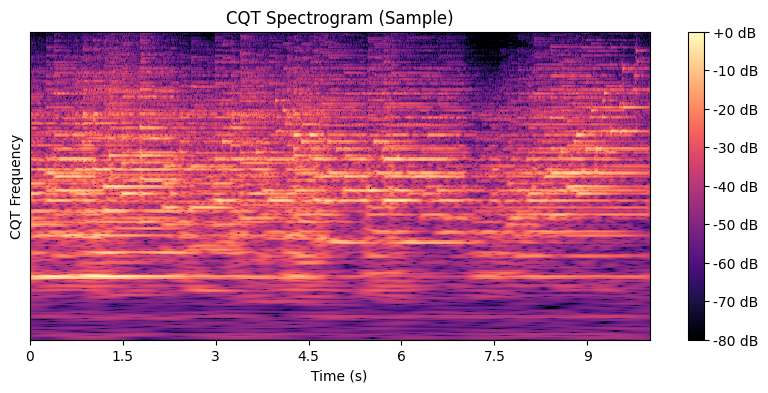

In [ ]:
path = r"F:\Dataset_open_topic\maestro-v3.0.0_all\Processed_data\train2\MIDI-Unprocessed_SMF_07_R1_2004_01_ORIG_MID--AUDIO_07_R1_2004_12_Track12_wav.wav_65.npy"
file = np.load(path)
plt.figure(figsize=(10, 4))
librosa.display.specshow(file, sr=sr, x_axis='time', y_axis='cqt_note', hop_length=hop_length_samples)
plt.colorbar(format='%+2.0f dB')
plt.title(f'CQT Spectrogram (Sample)')
plt.xlabel('Time (s)')
plt.ylabel('CQT Frequency')
plt.show()